### Python

In [1]:
# Load libraries
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import seaborn as sns

In [2]:
# Read data file
try:
    hotdog_winners_df = pd.read_excel("data/hotdog-contest-winners.xlsm")
except Exception:
    print("There was an error reading the Hotdog Contest Winners file")
    
hotdog_winners_df.head()

,Year,Winner,Dogs eaten,Country,New record
0,1980,Paul Siederman & Joe Baldini,9.1,United States,0
1,1981,Thomas DeBerry,11.0,United States,0
2,1982,Steven Abrams,11.0,United States,0
3,1983,Luis Llamas,19.5,Mexico,0
4,1984,Birgit Felden,9.5,Germany,0


In [3]:
# Read data file
try:
    obama_df = pd.read_excel("data/obama-approval-ratings.xls")
except Exception:
    print("There was an error reading the Hotdog Places file")
    
obama_df.head()

,Issue,Approve,Disapprove,None
0,Race Relations,52,38,10
1,Education,49,40,11
2,Terrorism,48,45,7
3,Energy Policy,47,42,11
4,Foreign Affairs,44,48,8


#### Charts

**1. Bar Chart**

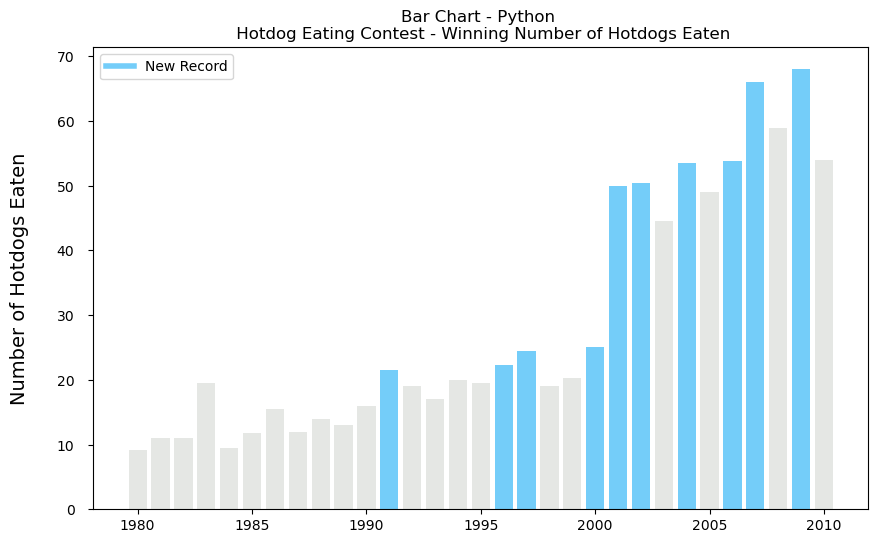

In [4]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(10, 6))

# Change color if new record
colors = ["#74cdf9" if record == 1 else "#e5e7e4" for record in hotdog_winners_df['New record']]

# plot bar chart
ax.bar(hotdog_winners_df['Year'], hotdog_winners_df['Dogs eaten'], color = colors)

# set labels
ax.set_ylabel('Number of Hotdogs Eaten', fontsize = 14)
ax.tick_params(axis='y', which='major', pad = 10)
ax.legend([Line2D([0], [0], color = '#74cdf9', lw = 4)], ['New Record'])
ax.set_title('Bar Chart - Python \n Hotdog Eating Contest - Winning Number of Hotdogs Eaten')
ax.yaxis.labelpad = 20.0

plt.show()

# Save figure
ax.get_figure().savefig('images/barchart-python.png',
           bbox_inches = 'tight',
           transparent = True)

**2. Stacked Bar Chart**

In [5]:
# Get percentages of Approve/Disapprove/None 
totals = [i + j + k for i, j, k in zip(obama_df['Approve'], obama_df['Disapprove'], obama_df['None'])]
approve = [i / j * 100 for i, j in zip(obama_df['Approve'], totals)]
disapprove = [i / j * 100 for i, j in zip(obama_df['Disapprove'], totals)]
none = [i / j * 100 for i, j in zip(obama_df['None'], totals)]

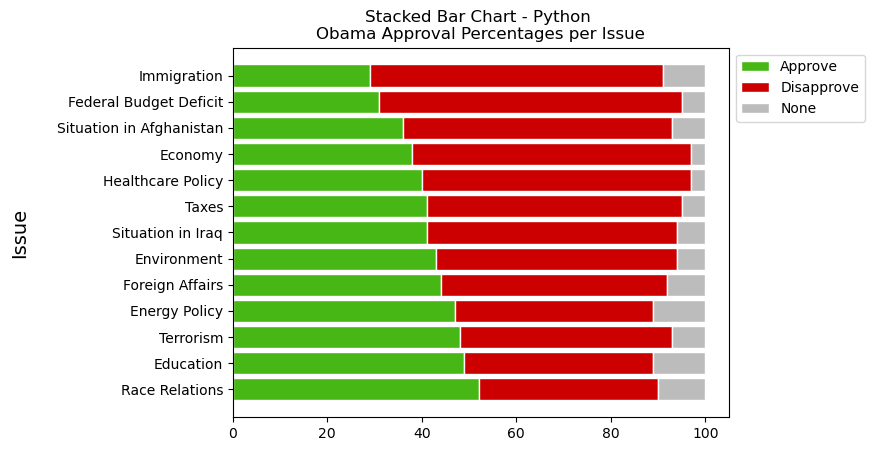

In [6]:
plt.rcdefaults()

fig, ax = plt.subplots()

# plot
barHeight = 0.85
names = obama_df['Issue']

# Create Approve
ax.barh(names, approve, color='#46b715', edgecolor='white', height=barHeight, label = 'Approve')

# Create Disapprove
ax.barh(names, disapprove, left=approve, color='#cc0000', edgecolor='white', height=barHeight, label = 'Disapprove')

# Create None
ax.barh(names, none, left=[i+j for i,j in zip(approve, disapprove)], color='#bcbcbc', edgecolor='white', 
         height=barHeight, label = 'None')
 
# Set labels
plt.ylabel("Issue", fontsize = 14)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Stacked Bar Chart - Python \nObama Approval Percentages per Issue')
ax.yaxis.labelpad = 20.0

plt.show()

# Save figure
ax.get_figure().savefig('images/stackedbarchart-python.png',
           bbox_inches = 'tight',
           transparent = True)

**3. Pie Chart**

In [7]:
countries = hotdog_winners_df['Country'].value_counts()

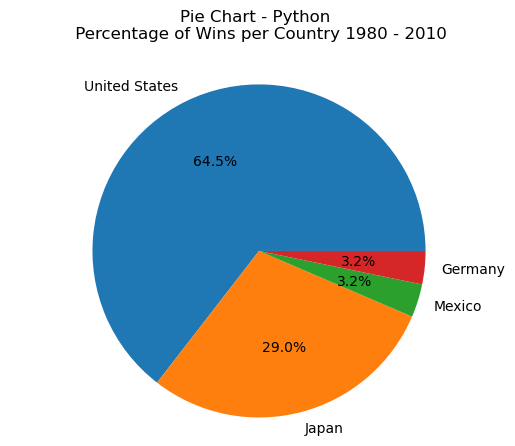

In [8]:
plt.rcdefaults()

fig, ax = plt.subplots()

ax.pie(countries.values, labels = countries.index, autopct='%1.1f%%',)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Title
plt.title('Pie Chart - Python \n Percentage of Wins per Country 1980 - 2010', pad = 20)

plt.show()

# Save figure
ax.get_figure().savefig('images\piechart-python.png',
           bbox_inches = 'tight',
           transparent = True)

**4. Donut**

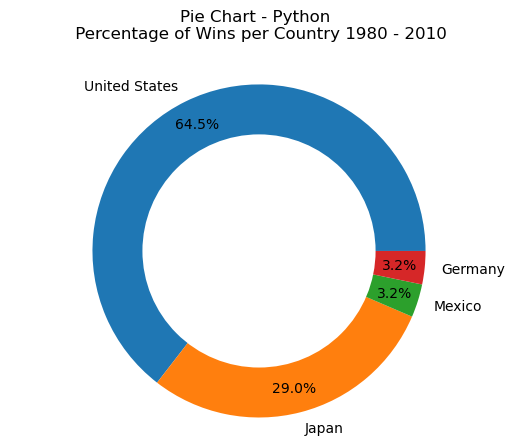

In [9]:
plt.rcdefaults()

fig, ax = plt.subplots()

# Create a pie chart
ax.pie(countries.values, labels = countries.index, autopct='%1.1f%%', pctdistance = 0.85)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Title
plt.title('Pie Chart - Python \n Percentage of Wins per Country 1980 - 2010', pad = 20)

plt.show()

# Save figure
ax.get_figure().savefig('images\donutchart-python.png',
           bbox_inches = 'tight',
           transparent = True)